In [ ]:
import pandas as pd
import numpy as np
import os
# from termcolor import colored
def hamaker_dataframe(filename,avg_val):
    df = pd.DataFrame({'filename':filename,
                      'avg_value':avg_val})
    

In [ ]:
import pandas as pd
import numpy as np
import os
from termcolor import colored

def hamaker_save_data(data_path, ampdf_data_nm, phasedf_degree, piezodf_data_nm, filenameAmplitude, filenamephase, A0, K=None, Q=None, R=None):
    # Reset index for all DataFrames
    ampdf_data_nm = ampdf_data_nm.reset_index(drop=True)
    phasedf_degree = phasedf_degree.reset_index(drop=True)
    piezodf_data_nm = piezodf_data_nm.reset_index(drop=True)

    # Ensure that the DataFrames have the same length
    min_length = min(len(ampdf_data_nm), len(phasedf_degree), len(piezodf_data_nm))
    ampdf_data_nm = ampdf_data_nm[:min_length]
    phasedf_degree = phasedf_degree[:min_length]
    piezodf_data_nm = piezodf_data_nm[:min_length]

    # Convert values to meters and radians
    amp_df_meter = ampdf_data_nm * 1e-9
    piezo_df_meter = piezodf_data_nm * 1e-9
    phase_df_radian = np.deg2rad(phasedf_degree)

    # Calculate Hamaker values
    hamaker_values = ((-3 * K * A0) / (Q * R)) * ((amp_df_meter ** 2) * np.cos(phase_df_radian)) * ((((piezo_df_meter + amp_df_meter) / amp_df_meter) ** 2) - 1) ** 1.5
    avg_hamaker = np.average(hamaker_values)  # average value of hamaker dataframe

    # Create DataFrame with columns 'piezo', 'amplitude', 'phase', and 'hamaker_values'
    df = pd.DataFrame({
        'piezo_meter': piezo_df_meter.values.flatten(),
        'amplitude_meter': amp_df_meter.values.flatten(),
        'phase_degree': phasedf_degree.values.flatten(),
        'phase_radian': phase_df_radian.values.flatten(),
        'hamaker_values': hamaker_values.values.flatten()
    })

    # Create directory 'hamaker_data' if it doesn't exist
    hamaker_dir = os.path.join(data_path, 'hamaker_data')
    if not os.path.exists(hamaker_dir):
        os.makedirs(hamaker_dir)

    # Save DataFrame to Excel file in 'hamaker_data' directory
    hamaker_filename = filenameAmplitude[:-5] + filenamephase[:-5] + "hamaker.xlsx"
    excel_file_path = os.path.join(hamaker_dir, hamaker_filename)
    df.to_excel(excel_file_path, index=False)

    return hamaker_filename, avg_hamaker, hamaker_values

# Example usage
if __name__ == "__main__":
    data_path = "datac\\"
    amp = pd.DataFrame([i for i in range(5)])
    pdf = pd.DataFrame([p for p in range(0, 50, 10)])
    pds = pd.DataFrame([d for d in range(6, 11, 1)])
    print("all data and see", amp, pdf, pds)
    ampfilename = 'ampl.xlsx'
    phasefilename = 'phas.xlsx'
    A0 = 20
    K = 50
    Q = 40
    R = 1
    res_hamaker = hamaker_save_data(data_path, amp, pdf, pds, ampfilename, phasefilename, A0, K, Q, R)
    print(res_hamaker)
    


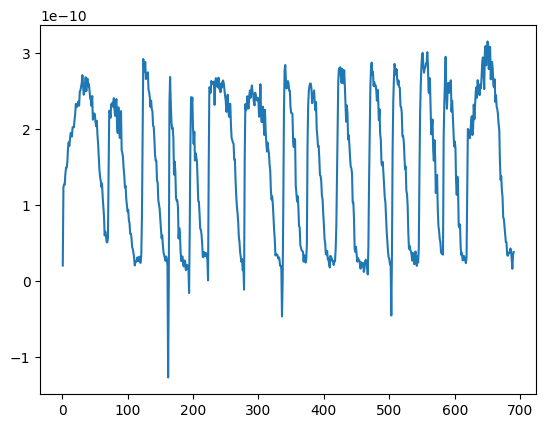

In [70]:
# val = df['hamaker_values']
# val1 = list(val)
# val1
# len(hamaker)
# val[1:]
plt.figure
plt.plot(hamaker)